In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('conversion_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
df.nunique()

country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64

In [48]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [49]:
df.country.unique()

array(['UK', 'US', 'China', 'Germany'], dtype=object)

In [50]:
df.source.unique()

array(['Ads', 'Seo', 'Direct'], dtype=object)

In [51]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,316200.0,30.569858,8.271802,17.0,24.0,30.0,36.0,123.0
new_user,316200.0,0.685465,0.464331,0.0,0.0,1.0,1.0,1.0
total_pages_visited,316200.0,4.872966,3.341104,1.0,2.0,4.0,7.0,29.0
converted,316200.0,0.032258,0.176685,0.0,0.0,0.0,0.0,1.0


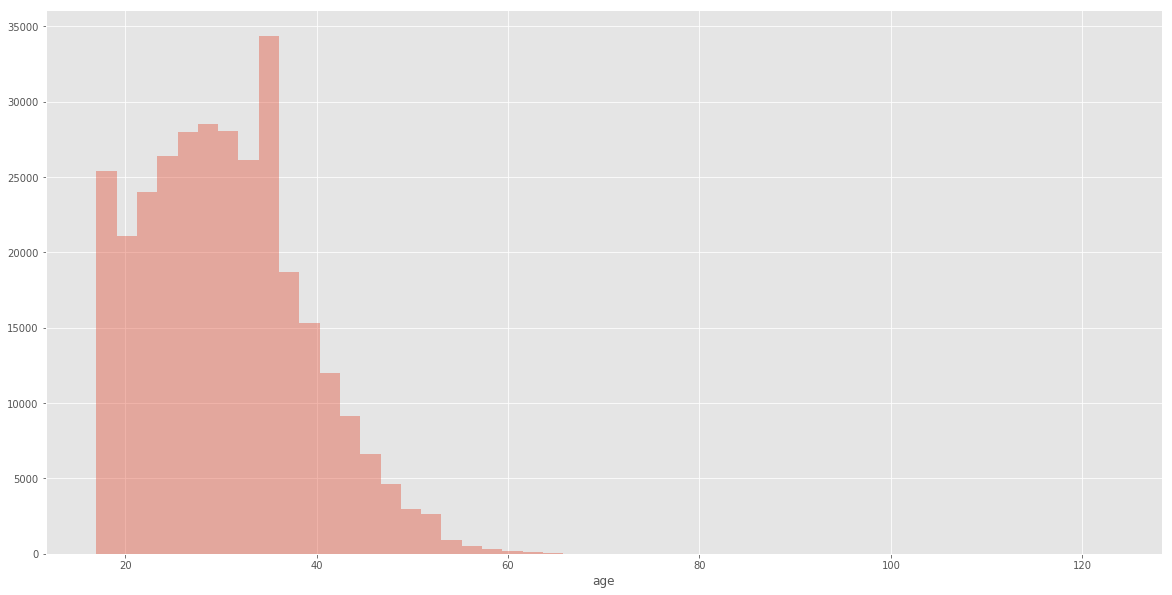

In [53]:
plt.figure(figsize=(20,10))
sns.distplot(df['age'],bins=50,kde=False)

In [72]:
df[df.age>80].size/df.size

0.0

In [73]:
df.converted.value_counts()

0    306000
1     10198
Name: converted, dtype: int64

In [55]:
df = df[df['age']<80]

In [78]:
# df['age'] = df['age'].astype('category')
# df['new_user'] = df['new_user'].astype('category')
# df['total_pages_visited'] = df['total_pages_visited'].astype('category')
# df['converted'] = df['converted'].astype('category')

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


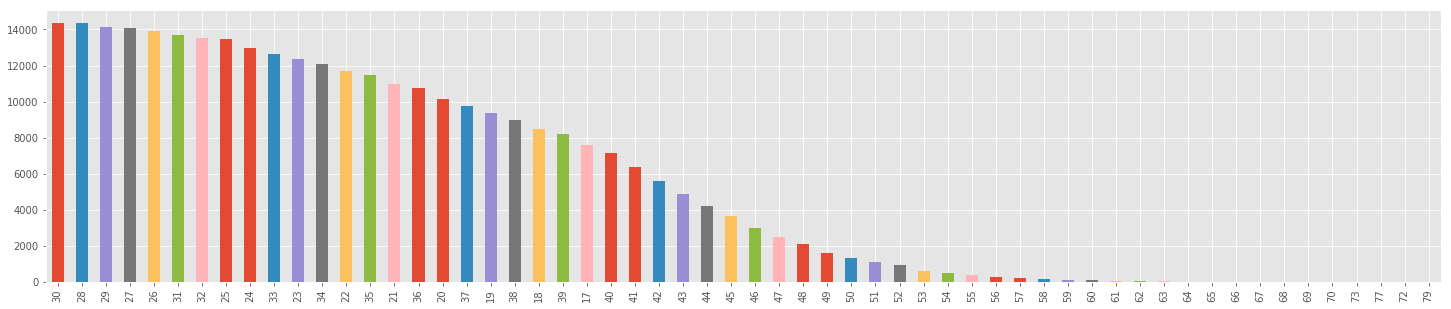

In [58]:
plt.figure(figsize=(25,5))
df.age.value_counts().plot(kind="bar")

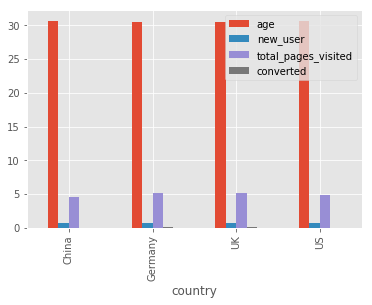

In [59]:
df.groupby(['country']).mean().plot(kind='bar')

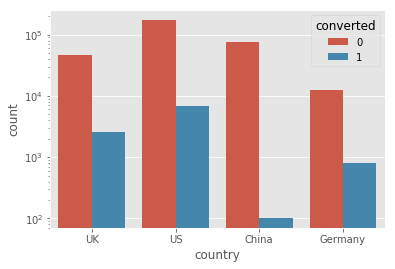

In [31]:
fig,ax = plt.subplots(nrows=1,ncols=1)
sns.countplot(x='country',data=df,hue='converted')
ax.set_yscale('log')

In [74]:
# grouped = df[['country','total_pages_visited']].groupby(''converted').mean()
# grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
# df[['total_pages_visited', 'converted']].groupby('total_pages_visited').sum(),
# df[['total_pages_visited', 'converted']].groupby('total_pages_visited').size()

In [79]:
# grouped.plot()

# plt.ylabel('converted rate')

In [85]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted', 'source_enc', 'country_enc'],
      dtype='object')

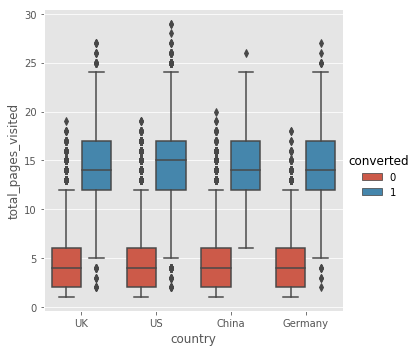

In [115]:
sns.catplot(x="country", y="total_pages_visited", hue='', kind="box", data=df);

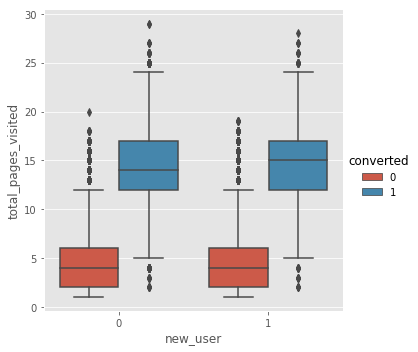

In [114]:
sns.catplot(x="new_user", y="total_pages_visited", hue='converted', kind="box", data=df);

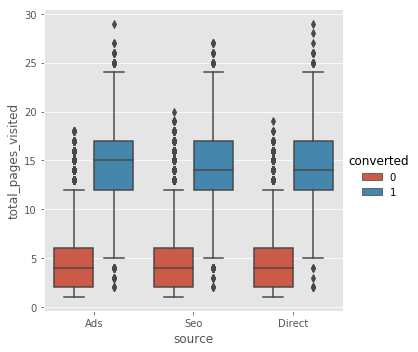

In [90]:
sns.catplot(x="source", y="total_pages_visited", hue='converted', kind="box", data=df);

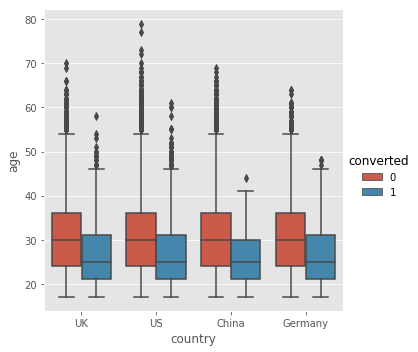

In [116]:
sns.catplot(x="country", y="age", hue='converted', kind="box", data=df);

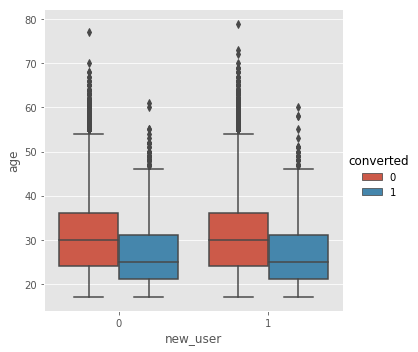

In [117]:
sns.catplot(x="new_user", y="age", hue='converted', kind="box", data=df);

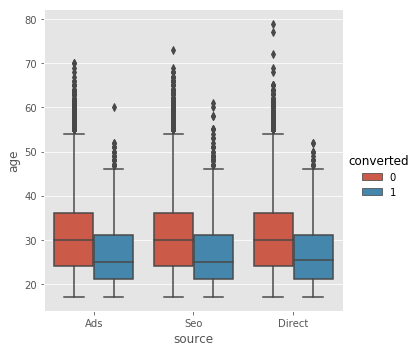

In [118]:
sns.catplot(x="source", y="age", hue='converted', kind="box", data=df);

In [120]:
df.nunique()

country                 4
age                    58
new_user                2
source                  3
total_pages_visited    29
converted               2
source_enc              3
country_enc             4
dtype: int64

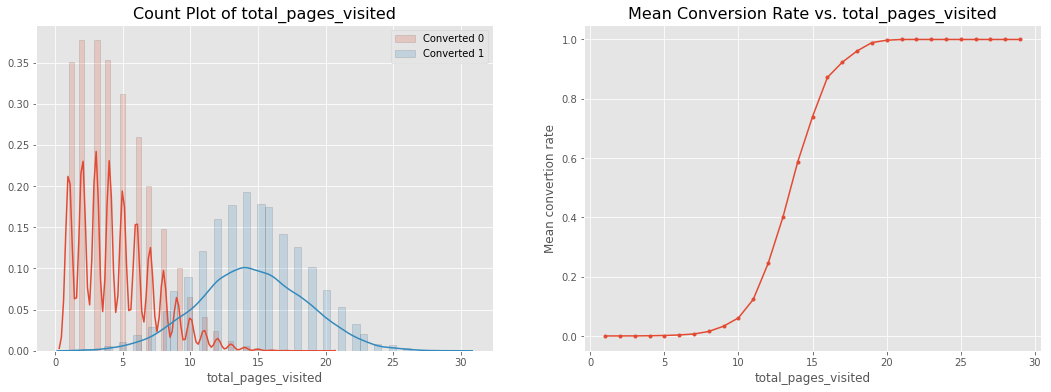

In [138]:
grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of total_pages_visited', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [141]:
grouped

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985
5,22,0.053243
6,23,0.047990
7,24,0.045448
8,25,0.038782
9,26,0.039767


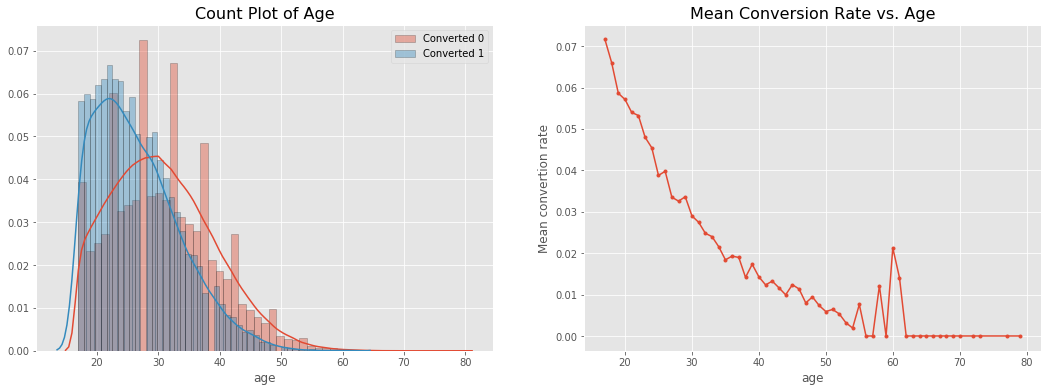

In [140]:
grouped = df[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.4}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [ ]:
grouped = df[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [91]:
label_encoder = LabelEncoder()
df['source_enc'] = label_encoder.fit_transform(df['source'])
df['country_enc'] = label_encoder.fit_transform(df['country'])

In [92]:
df.head()

,country,age,new_user,source,total_pages_visited,converted,source_enc,country_enc
0,UK,25,1,Ads,1,0,0,2
1,US,23,1,Seo,5,0,2,3
2,US,28,1,Seo,4,0,2,3
3,China,39,1,Seo,5,0,2,0
4,US,30,1,Seo,6,0,2,3


In [93]:
X = df.drop(['country','source','converted'],axis=1)
y = df['converted']

In [94]:
X.head()

,age,new_user,total_pages_visited,source_enc,country_enc
0,25,1,1,0,2
1,23,1,5,2,3
2,28,1,4,2,3
3,39,1,5,2,0
4,30,1,6,2,3


In [95]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 101)

In [96]:
rf_clf = RandomForestClassifier()

In [97]:
param_grid = {"n_estimators": [10,20,30],
              "max_features": [4,5]}

# run randomized search
random_search = GridSearchCV(rf_clf, param_grid = param_grid, verbose=2, cv = 5)

In [98]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_features=4, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. max_features=4, n_estimators=10, total=   1.6s
[CV] max_features=4, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .................. max_features=4, n_estimators=10, total=   1.0s
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   1.1s
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   1.0s
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   1.0s
[CV] max_features=4, n_estimators=20 .................................
[CV] .................. max_features=4, n_estimators=20, total=   2.0s
[CV] max_features=4, n_estimators=20 .................................
[CV] .................. max_features=4, n_estimators=20, total=   2.2s
[CV] max_features=4, n_estimators=20 .................................
[CV] .................. max_features=4, n_estimators=20, total=   2.6s
[CV] max_features=4, n_estimators=20 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
random_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [100]:
y_pred_rf = random_search.predict(X_test)

In [101]:
print(confusion_matrix(y_test, y_pred_rf))

[[91269   532]
 [  965  2094]]


In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91801
           1       0.80      0.68      0.74      3059

   micro avg       0.98      0.98      0.98     94860
   macro avg       0.89      0.84      0.86     94860
weighted avg       0.98      0.98      0.98     94860



In [103]:
random_search.score(X_test,y_test)

0.9842188488298546

In [104]:
lrcv_clf = LogisticRegressionCV(Cs=[1,3,5,7], cv = 5, verbose = 2)

In [105]:
lrcv_clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished


LogisticRegressionCV(Cs=[1, 3, 5, 7], class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=2)

In [106]:
y_pred_lrcv = lrcv_clf.predict(X_test)

In [107]:
print(confusion_matrix(y_test, y_pred_lrcv))

[[91418   383]
 [ 1006  2053]]


In [108]:
print(classification_report(y_test, y_pred_lrcv))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.84      0.67      0.75      3059

   micro avg       0.99      0.99      0.99     94860
   macro avg       0.92      0.83      0.87     94860
weighted avg       0.98      0.99      0.98     94860



In [109]:
lr_clf = LogisticRegression(solver = 'lbfgs')

In [110]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_pred_lr = lr_clf.predict(X_test)

In [112]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[91418   383]
 [ 1006  2053]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.84      0.67      0.75      3059

   micro avg       0.99      0.99      0.99     94860
   macro avg       0.92      0.83      0.87     94860
weighted avg       0.98      0.99      0.98     94860

